# Microsoft Stock Prediction Using LSTM, STACKED LSTM and BiDirectional LSTM


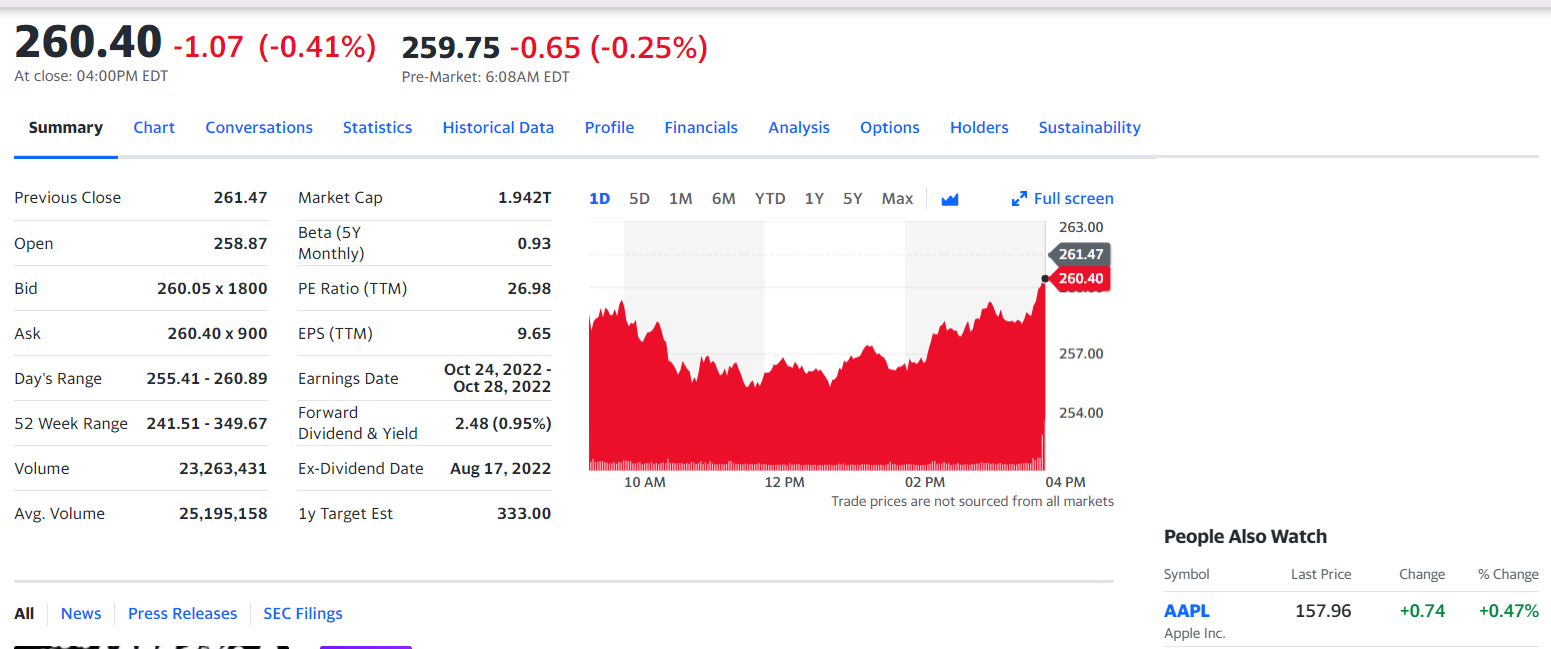

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
df=pd.read_csv('MSFT.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1,1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2,1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
3,1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
4,1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
1421,8/25/2022,277.329987,279.019989,274.519989,278.850006,278.850006,16583400
1422,8/26/2022,279.079987,280.339996,267.980011,268.089996,268.089996,27532500
1423,8/29/2022,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
1424,8/30/2022,266.670013,267.049988,260.660004,262.970001,262.970001,22767100
1425,8/31/2022,265.390015,267.109985,261.329987,261.470001,261.470001,24728900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1426 non-null   object 
 1   Open       1426 non-null   float64
 2   High       1426 non-null   float64
 3   Low        1426 non-null   float64
 4   Close      1426 non-null   float64
 5   Adj_Close  1426 non-null   float64
 6   Volume     1426 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1.426000e+03
mean,169.561353,171.243268,167.753464,169.588822,165.923293,2.890647e+07
std,82.510456,83.402749,81.533050,82.509972,83.539829,1.262903e+07
min,62.189999,62.660000,61.950001,62.299999,57.549179,7.425600e+06
25%,98.414999,99.912503,97.302502,98.444999,93.971956,2.075820e+07
50%,142.135002,144.700005,139.805001,141.455001,137.402313,2.568230e+07
75%,243.832501,245.525005,241.487496,243.752502,240.720516,3.318965e+07
max,344.619995,349.670013,342.200012,343.109985,340.882782,1.112421e+08


# Compute Mean, STD, Min and Max Values

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [10]:
df.shape

(1426, 7)

In [11]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj_Close    False
Volume       False
dtype: bool

In [12]:
df.isnull()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1421,False,False,False,False,False,False,False
1422,False,False,False,False,False,False,False
1423,False,False,False,False,False,False,False
1424,False,False,False,False,False,False,False


# Visualize the overall trend of the Dataset

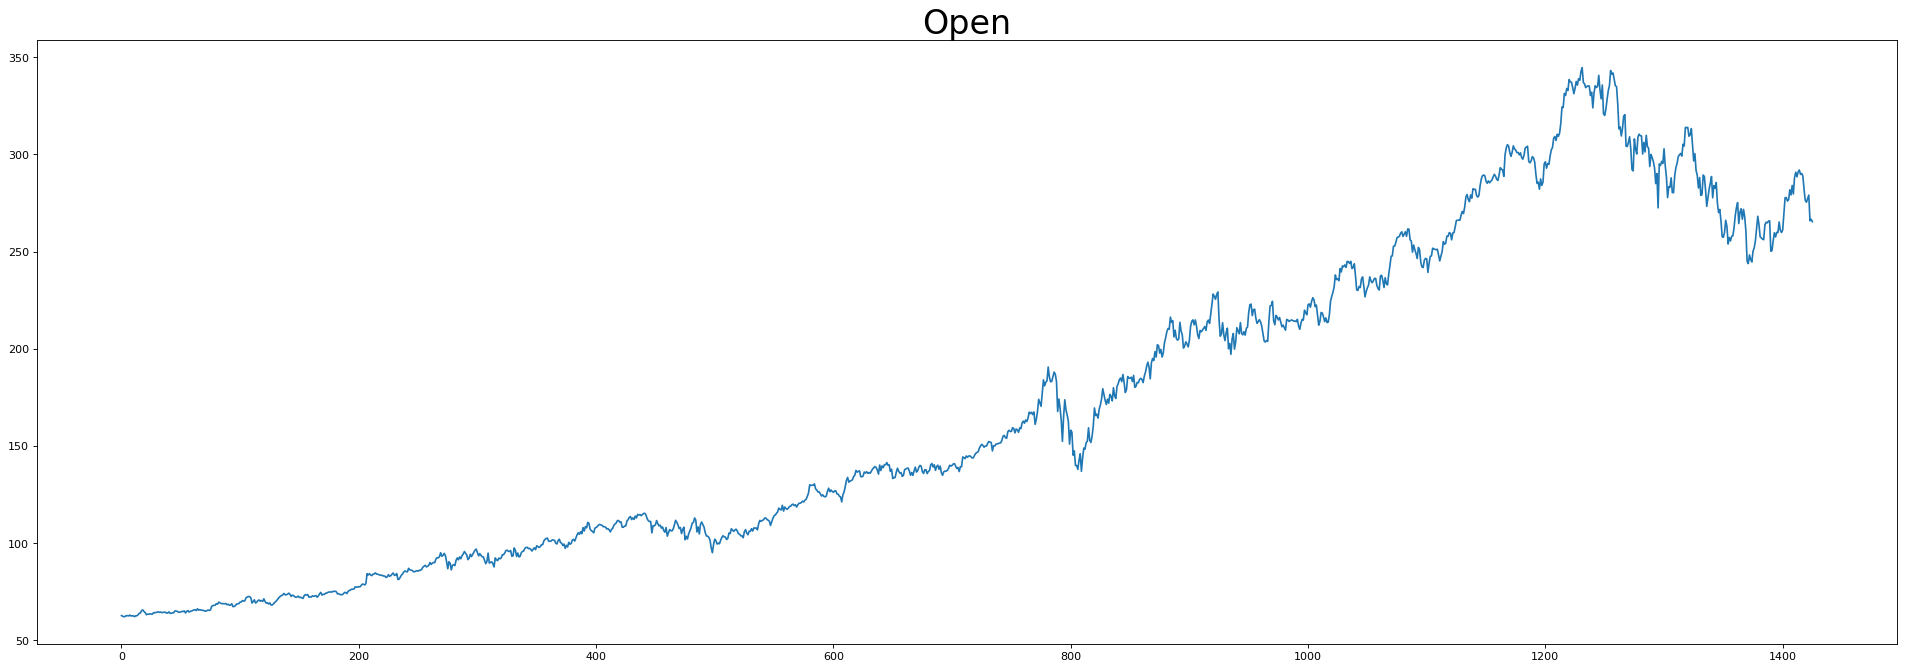

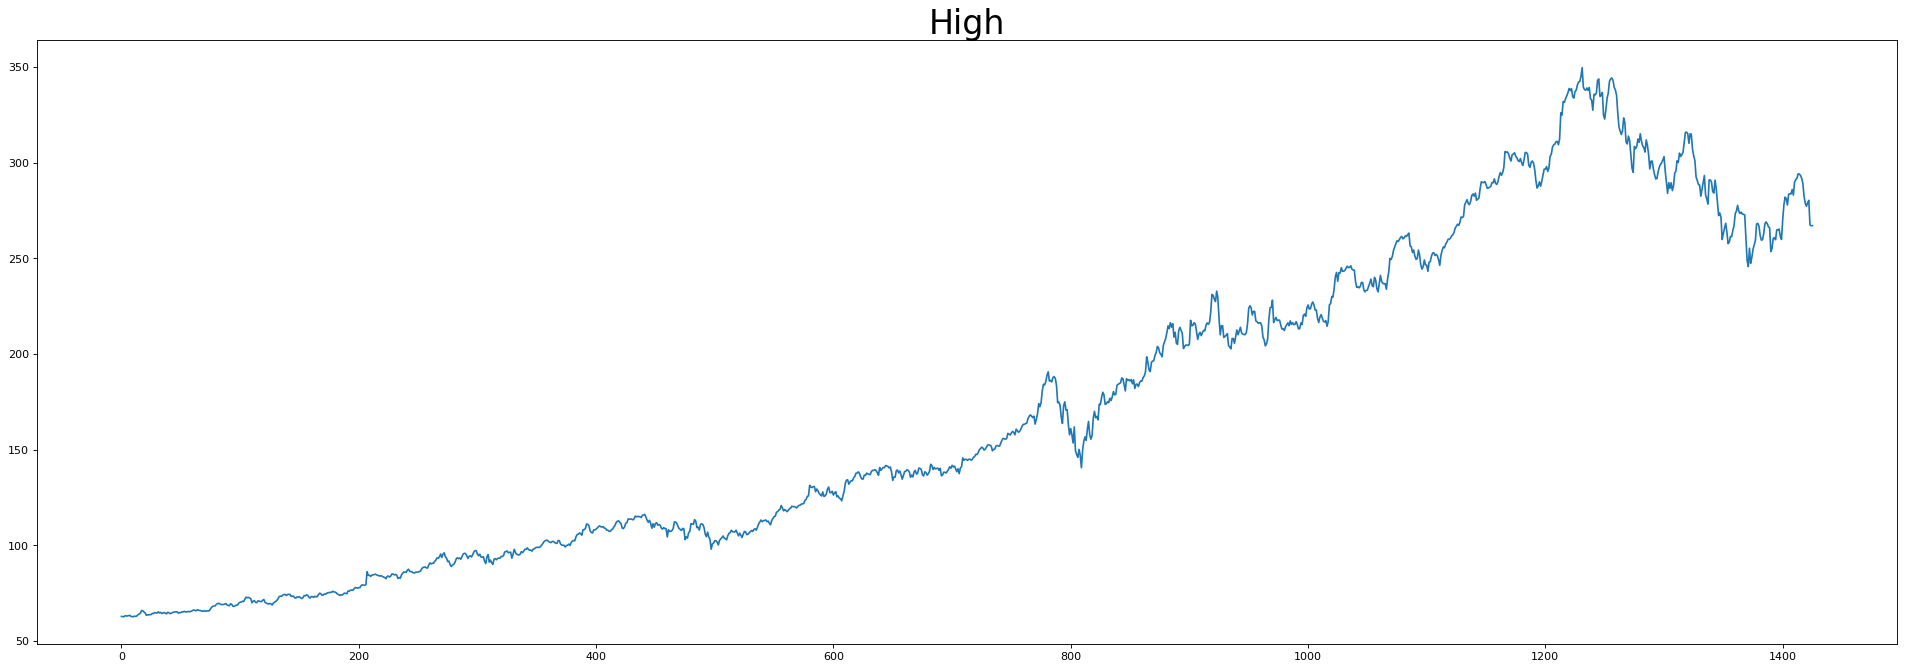

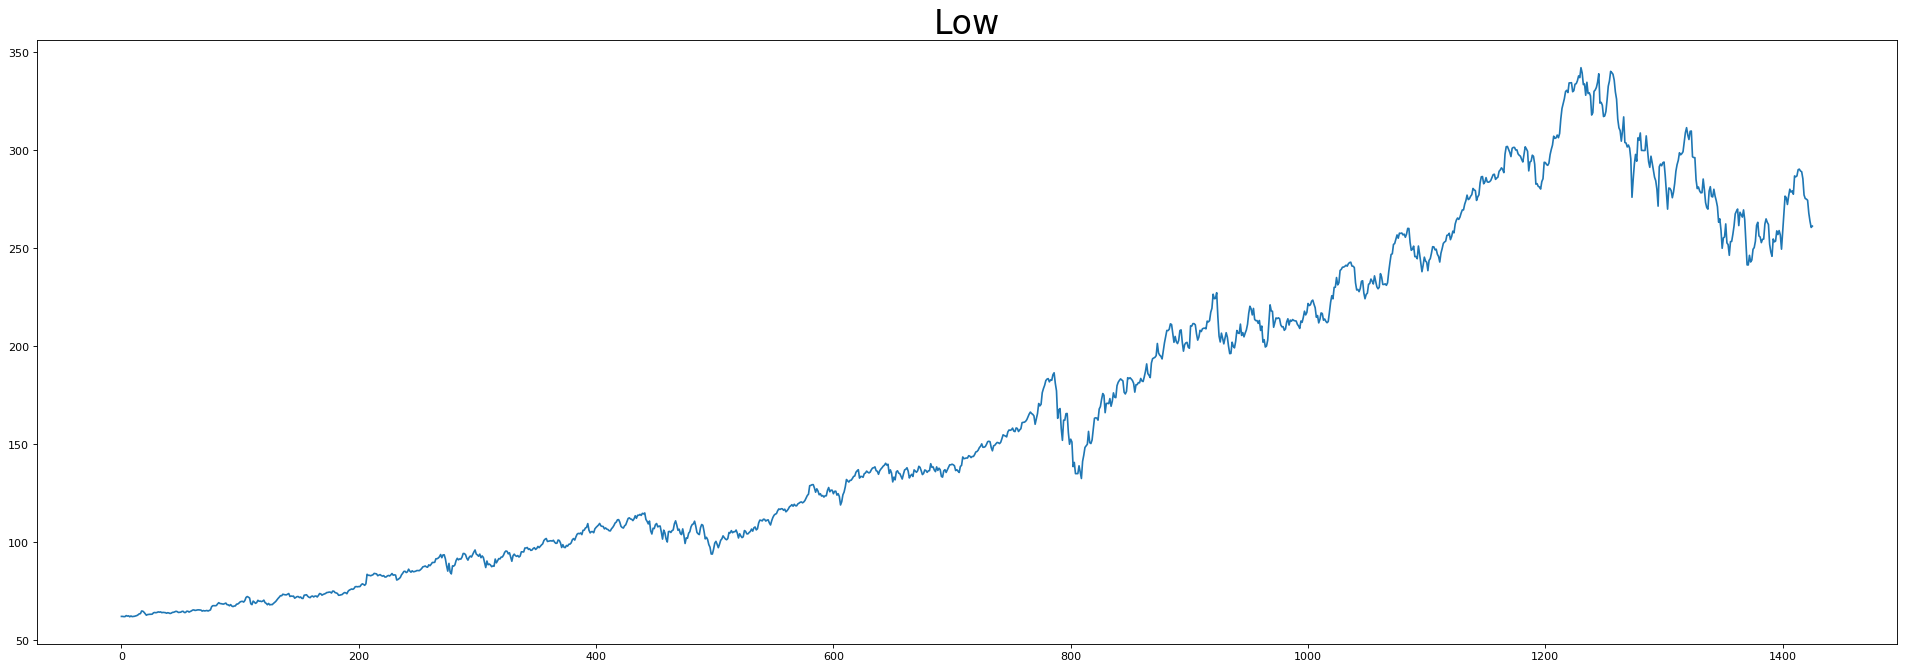

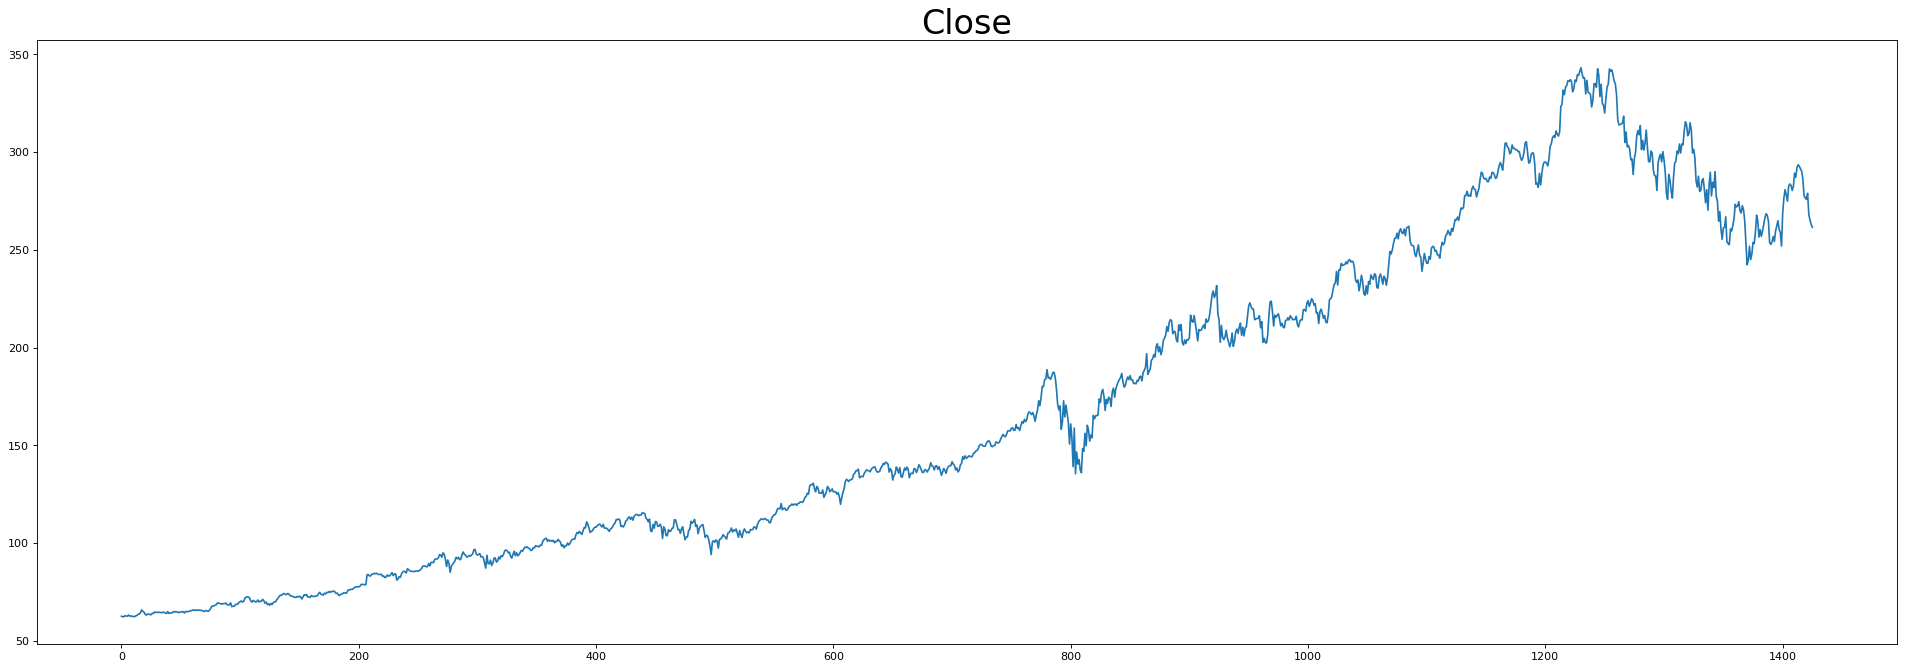

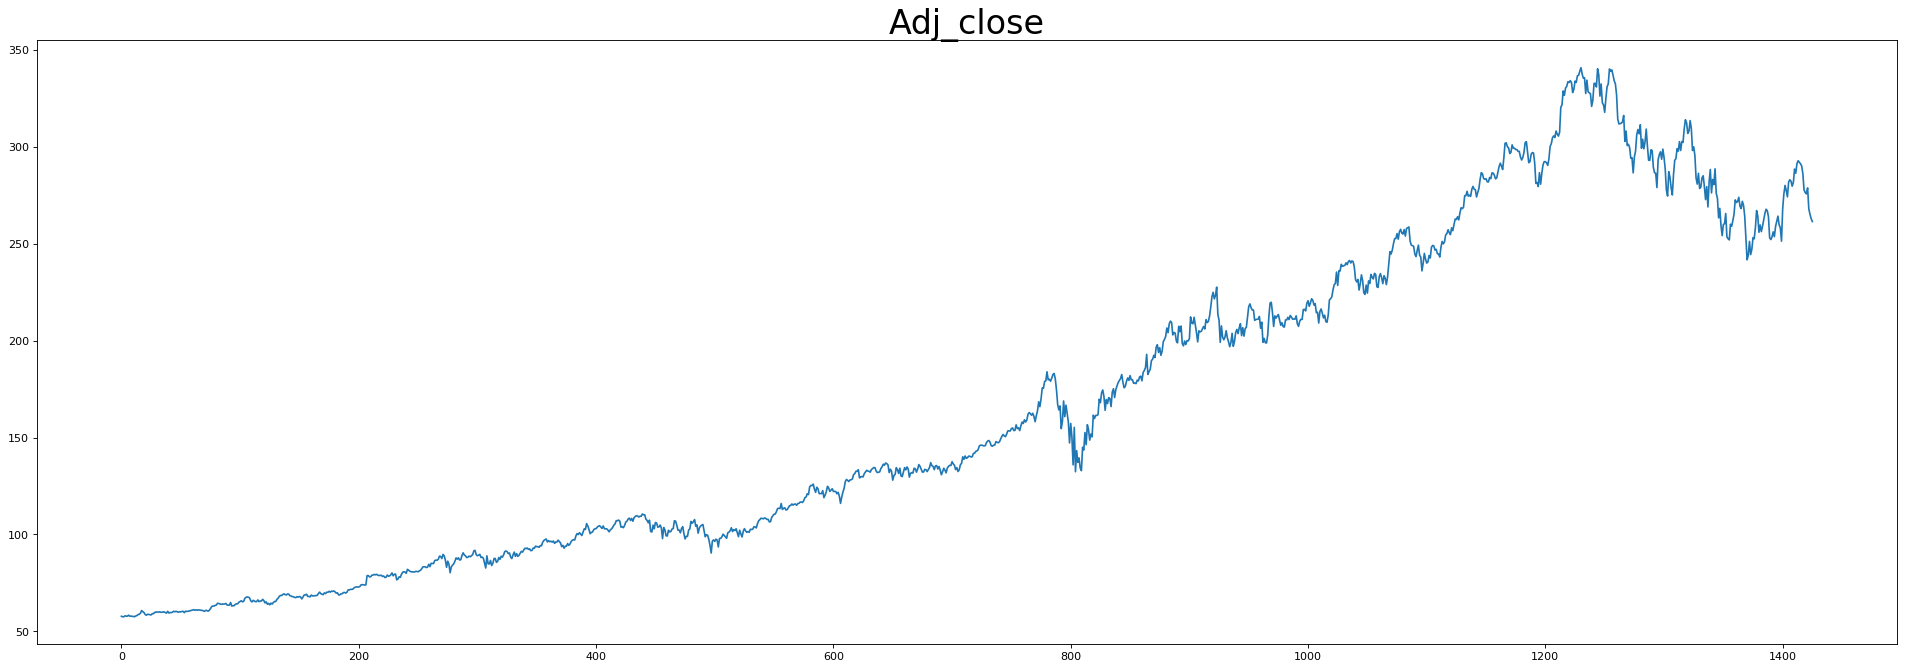

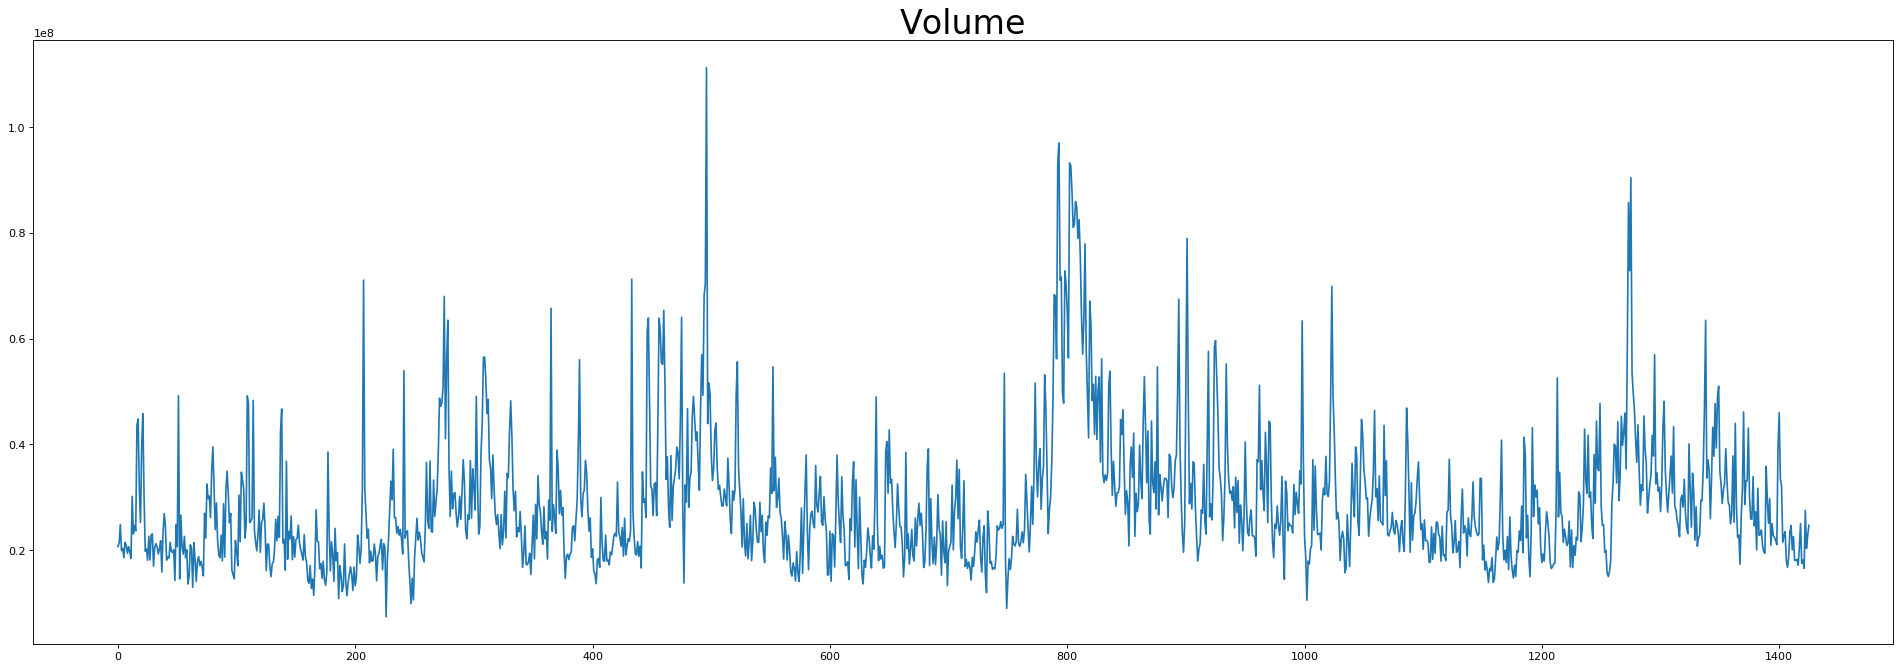

In [14]:
plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('Open', fontsize=30)
plt.plot(df.Open)

plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('High', fontsize=30)
plt.plot(df.High)

plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('Low', fontsize=30)
plt.plot(df.Low)

plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('Close', fontsize=30)
plt.plot(df.Close)

plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('Adj_close', fontsize=30)
plt.plot(df.Adj_Close)

plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w',edgecolor='k')
plt.title('Volume', fontsize=30)
plt.plot(df.Volume)



# Line Plot

In [15]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


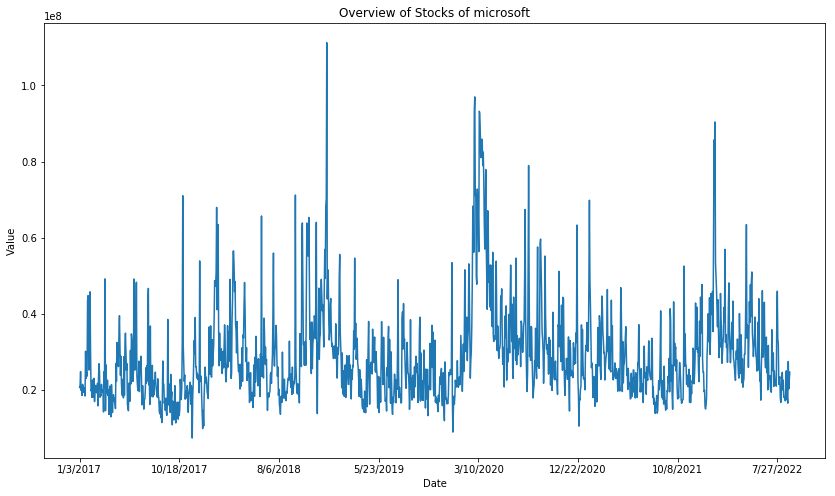

In [18]:
df['Volume'].plot(kind='line',figsize=(14,8))

plt.title('Overview of Stocks of microsoft')
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

# Area Plot

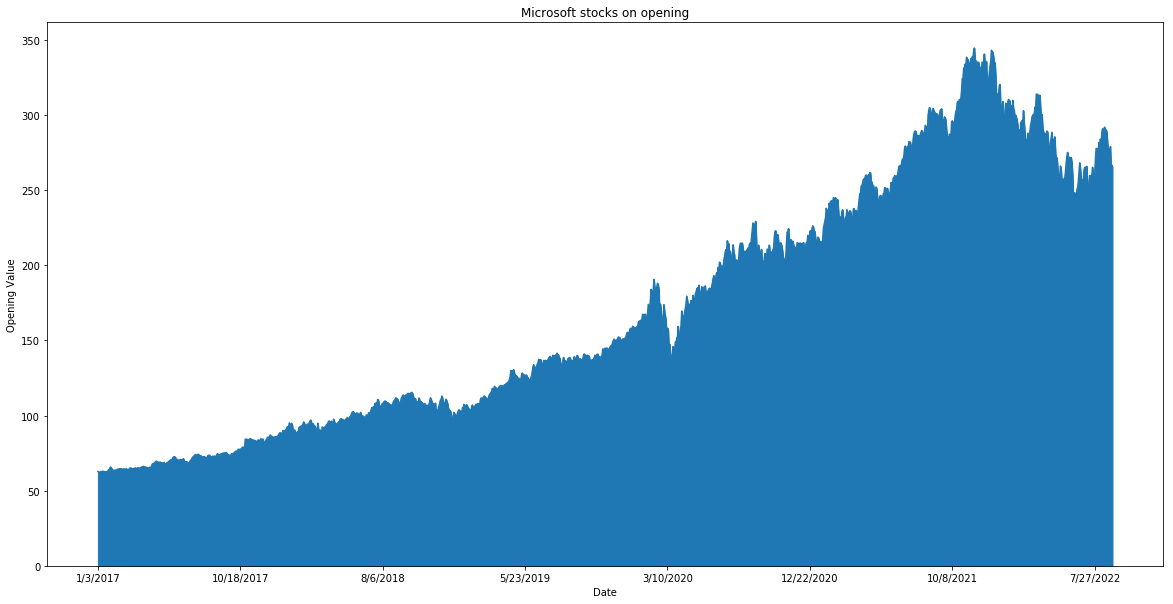

In [19]:
df['Open'].plot(kind='area',stacked=True,figsize=(20,10))

plt.title('Microsoft stocks on opening')
plt.ylabel('Opening Value')
plt.xlabel('Date')

plt.show()

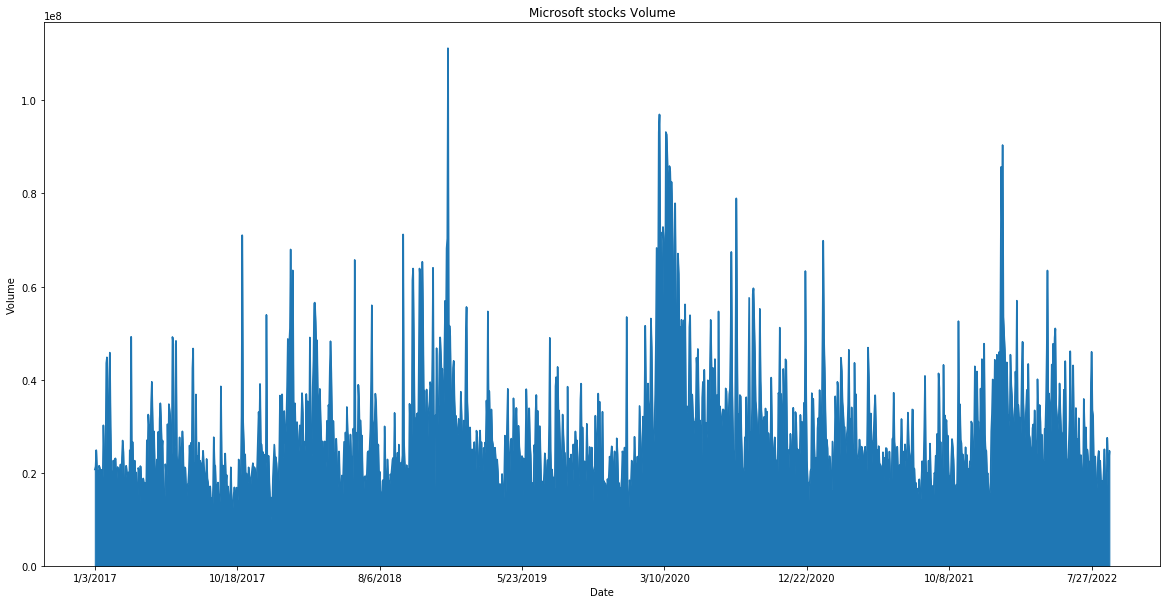

In [20]:
df['Volume'].plot(kind='area',stacked=True,figsize=(20,10))

plt.title('Microsoft stocks Volume')
plt.ylabel('Volume')
plt.xlabel('Date')

plt.show()

# Visualize Correlation, STD and Mean

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Mean Over Time')

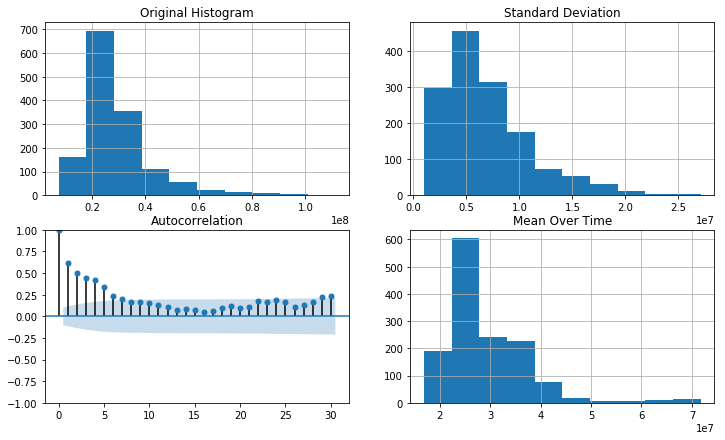

In [22]:
fig=plt.figure(figsize=(12,7))
layout=(2,2)
hist_ax=plt.subplot2grid(layout,(0,0))
ac_ax=plt.subplot2grid(layout,(1,0))
hist_std_ax= plt.subplot2grid(layout,(0,1))
mean_ax=plt.subplot2grid(layout,(1,1))


df.Volume.hist(ax=hist_ax)
hist_ax.set_title("Original Histogram")

series= df.Volume[:365]

plot_acf(series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm= df.Volume.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard Deviation")

mm= df.Volume.rolling(30).mean()
mm.hist(ax=mean_ax)
mean_ax.set_title("Mean Over Time")


# Check Stationarity

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
X=df.Volume.values
result=adfuller(X)

In [25]:
print('ADF Statistics:%f'%result[0])
print('p-value:%f'%result[1])

print('Critical Values')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key,value))

ADF Statistics:-5.557343
p-value:0.000002
Critical Values
	1%: -3.435
	5%: -2.864
	10%: -2.568


# 1. Volume Forecasting using LSTM Model

In [26]:
train_dates=pd.to_datetime(df['Date'])
train_dates

KeyError: 'Date'

In [35]:
df.reset_index(inplace=True)

In [36]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1,1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2,1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
3,1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
4,1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700
...,...,...,...,...,...,...,...
1421,8/25/2022,277.329987,279.019989,274.519989,278.850006,278.850006,16583400
1422,8/26/2022,279.079987,280.339996,267.980011,268.089996,268.089996,27532500
1423,8/29/2022,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
1424,8/30/2022,266.670013,267.049988,260.660004,262.970001,262.970001,22767100


In [37]:
train_dates=pd.to_datetime(df['Date'])
train_dates

0      2017-01-03
1      2017-01-04
2      2017-01-05
3      2017-01-06
4      2017-01-09
          ...    
1421   2022-08-25
1422   2022-08-26
1423   2022-08-29
1424   2022-08-30
1425   2022-08-31
Name: Date, Length: 1426, dtype: datetime64[ns]

In [38]:
cols=list(df)[6:7]
cols

['Volume']

In [39]:
df_for_training=df[cols].astype(float)
df_for_training

,Volume
0,20694100.0
1,21340000.0
2,24876000.0
3,19922900.0
4,20382700.0
...,...
1421,16583400.0
1422,27532500.0
1423,20338500.0
1424,22767100.0


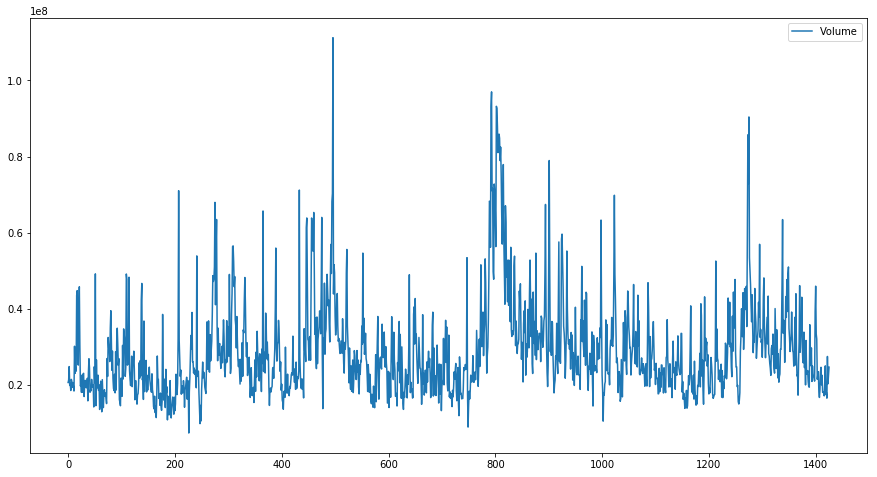

In [40]:
df_for_plot=df_for_training
df_for_plot.plot.line(figsize=(15,8))

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
scaler=scaler.fit(df_for_training)
df_for_training_scaled=scaler.transform(df_for_training)

In [44]:
df_for_training_scaled

array([[-0.65050546],
       [-0.59934343],
       [-0.31925529],
       ...,
       [-0.6786727 ],
       [-0.4863022 ],
       [-0.33090715]])

In [45]:
df_for_training.shape[1]

1

In [46]:
len(df_for_training_scaled)

1426

In [47]:
trainX=[]
trainY=[]

n_future=1
n_past=25
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i-n_past:i,0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future-1:i+n_future,0])

trainX,trainY=np.array(trainX), np.array(trainY)

print('trainX shape==={}.'.format(trainX.shape))
print('trainY shape==={}.'.format(trainY.shape))

trainX shape===(1401, 25, 1).
trainY shape===(1401, 1).


In [48]:
from keras.models import Sequential

In [120]:
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Bidirectional, BatchNormalization, Embedding

In [121]:
model=Sequential()
model.add(Bidirectional(LSTM(32,activation='relu',return_sequences=True),input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))

model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_10 (Bidirecti  (None, 25, 64)           8704      
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 25, 64)            0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 64)               24832     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-tra

In [122]:
history=model.fit(trainX,trainY,epochs=62,batch_size=16,validation_split=0.1,verbose=1)

Epoch 1/62
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
75/79 [===========================>..] - ETA: 0s - loss: 0.7608WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000227ACC01F28> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full

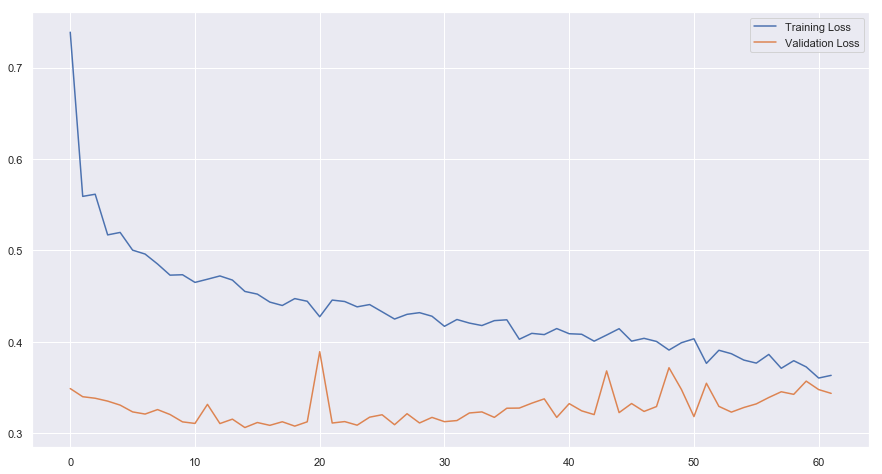

In [123]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [124]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [125]:
from pandas.tseries.offsets import CustomBusinessDay

In [126]:
us_bd=CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [127]:
n_past=10
n_days_for_prediction=100


In [128]:
predict_period_dates=pd.date_range(list(train_dates)[-n_past],periods=n_days_for_prediction,freq=us_bd).tolist()

In [129]:
prediction=model.predict(trainX[-n_days_for_prediction:])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [130]:
prediction_copies=np.repeat(prediction,df_for_training.shape[1],axis=-1)

prediction_copies.shape

(100, 1)

In [131]:
y_pred_future=scaler.inverse_transform(prediction_copies)[:,0]

In [132]:
forecast_dates=[]
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast=pd.DataFrame({'Date':np.array(forecast_dates), 'Volume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

C:\Users\lenovo\anaconda3\envs\grl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\anaconda3\envs\grl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\lenovo\anaconda3\envs\grl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error

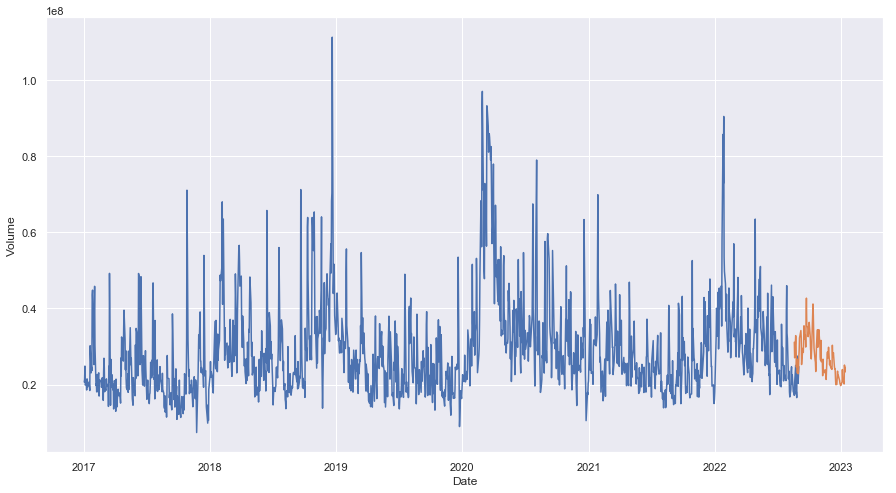

In [133]:
original=df[['Date','Volume']]
original['Date']=pd.to_datetime(original['Date'])
original=original.loc[original['Date']>='2017-1-3']

import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(original['Date'],original['Volume'])
sns.lineplot(df_forecast['Date'], df_forecast['Volume'])

# 2- Volume Forecasting Using Stacked LSTM Model

# 3-BiLSTM